Logistic Regression & Support Vector Machines
===

Load the dataset

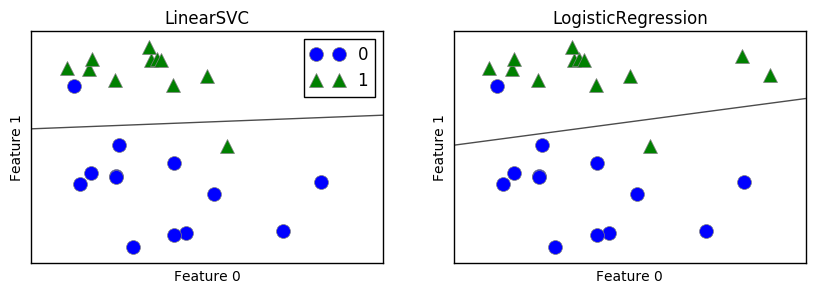

In [4]:
%matplotlib inline
import mglearn
import sklearn
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    classifier = model.fit(X, y)
    mglearn.plots.plot_2d_separator(classifier, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_title("{}".format(classifier.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
axes[0].legend()

Classification with different C values.  A low C value stresses the importance of adjusting to the majority, while a high C values stresses the importance that each individual data point be classified correctly.  Here is an illustration using `LinearSVC`

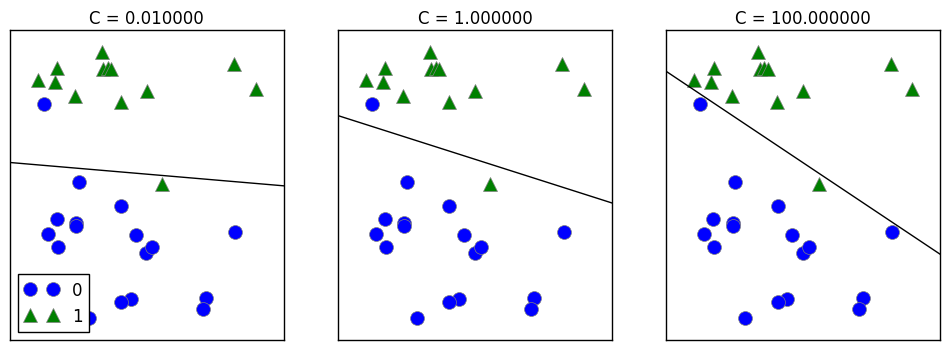

In [5]:
mglearn.plots.plot_linear_svc_regularization()

Scoring Logistic Regression on the Breast Cancer dataset

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Testing set score: 0.958


With training and test set scores both very close, it is likely we are underfitting.  Let's increase C to fit a more flexible model.

In [11]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.974
Testing set score: 0.965


Examine multiple values of C

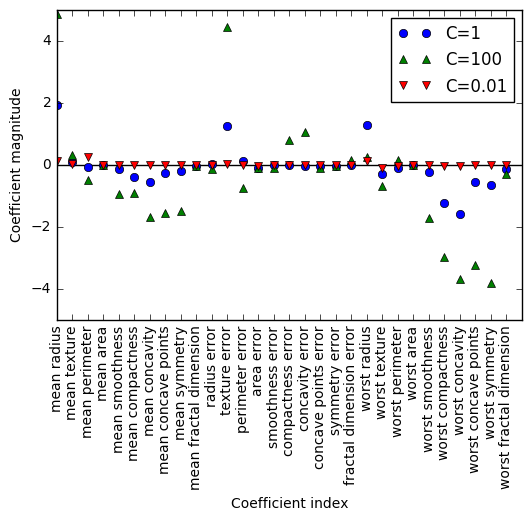

In [12]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.legend()

`LogisticRegression` applies an L2 regularization by default (results similar to `Ridge`).  For a more interpretable model, using L1 regularization may help, as it limits the model to using only a few features.

Training set score for L1 Logistic Regression with C=0.001: 0.913
Test set score for L1 Logistic Regression with C=0.001: 0.923
Training set score for L1 Logistic Regression with C=1.000: 0.960
Test set score for L1 Logistic Regression with C=1.000: 0.958
Training set score for L1 Logistic Regression with C=100.000: 0.986
Test set score for L1 Logistic Regression with C=100.000: 0.979


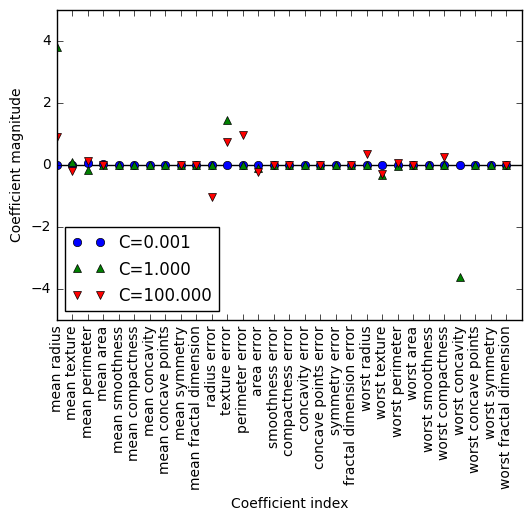

In [13]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    l1_logreg = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    
    print("Training set score for L1 Logistic Regression with C={:.3f}: {:.3f}".format(C, l1_logreg.score(X_train, y_train)))
    print("Test set score for L1 Logistic Regression with C={:.3f}: {:.3f}".format(C, l1_logreg.score(X_test, y_test)))
    
    plt.plot(l1_logreg.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.legend(loc=3)